## 활용 공공데이터
#### - 한국장애인고용공단 : 2022년 기업체장애인고용실태조사(보고서)
#### - 공공데이터포털 : 한국장애인고용공단_장애인경제활동실태조사

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
import pyreadstat
font_path = "C:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)
data_file = "../data/데이터_2022년 상반기 장애인경제활동실태조사(220118).sav"
data, meta = pyreadstat.read_sav(data_file)
excel_file = pd.ExcelFile("../data/(심층-고용)2022 기업체장애인고용실태조사.xlsx")
train_df = excel_file.parse('Sheet1')

# 1. 아이디어 제안 배경

### (1) 직업별 고용현황

- 장애인 고용현황(직업별 구분)

In [36]:
ax = ['DIS_JB1_T','DIS_JB2_T','DIS_JB3_T','DIS_JB4_T','DIS_JB5_T','DIS_JB6_T','DIS_JB7_T','DIS_JB8_T','DIS_JB9_T']
melted_df_dis = pd.melt(train_df[ax], var_name='Variable', value_name='Value')
sum_df_dis = melted_df_dis.groupby('Variable').sum().reset_index()
value_list = sum_df_dis['Value'].tolist()
ratio_list_dis = []
for i in value_list:
    ratio_list_dis.append(i/sum(train_df['DIS_JB0_T']))

- 비장애인 고용 현황

In [37]:
ax_line = ['EMP_JB1_T','EMP_JB2_T','EMP_JB3_T','EMP_JB4_T','EMP_JB5_T','EMP_JB6_T','EMP_JB7_T','EMP_JB8_T','EMP_JB9_T']
melted_df = pd.melt(train_df[ax_line], var_name='Variable_line', value_name='Value_line')
sum_df = melted_df.groupby('Variable_line').sum().reset_index()
value_list_line = sum_df['Value_line'].tolist()
ratio_list_emp = []
for i in value_list_line:
    ratio_list_emp.append(i/sum(train_df['EMP_JB0_T']))

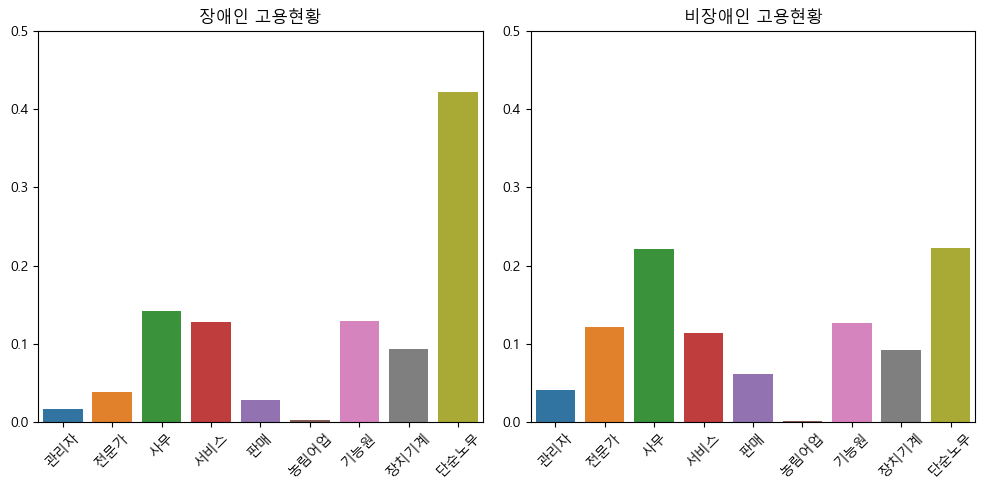

In [38]:
x_labels = ['관리자', '전문가', '사무', '서비스', '판매', '농림어업', '기능원', '장치기계', '단순노무']
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,5))
sns.barplot(x=x_labels, y= ratio_list_dis, ax = ax1)
ax1.set_title('장애인 고용현황')
ax1.set_ylim([0,0.5])
ax1.set_xticklabels(x_labels, rotation=45)
sns.barplot(x=x_labels, y= ratio_list_emp, ax = ax2)
ax2.set_title('비장애인 고용현황')
ax2.set_ylim([0,0.5])
ax2.set_xticklabels(x_labels, rotation=45)
plt.tight_layout()  
plt.show()

```
장애인의 직업별 고용현황은 단순노무직 42%, 사무 14%, 서비스 12%로 나타났으며, 단순노무직 종사자가 비장애인(22%)과 비교하여 2배 가량 높음을 알 수 있음
```

### (2) 근로형태별 고용현황

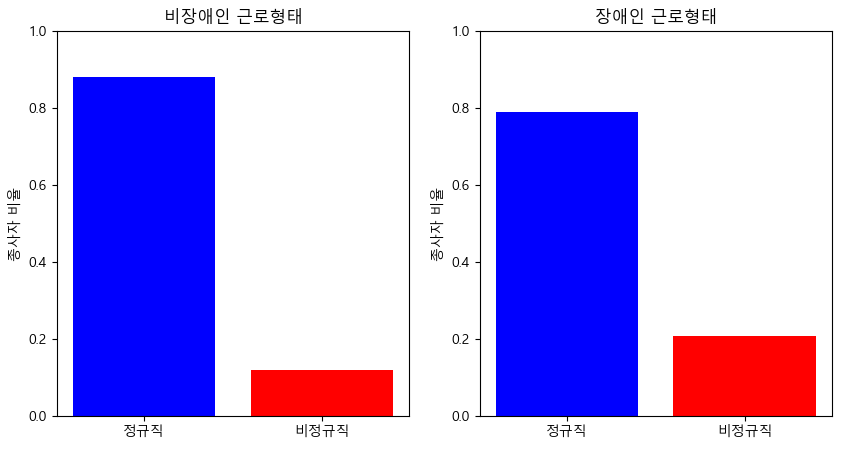

In [39]:
EMP_IN = train_df['EMP_IN21_T']
EMP_IN_sum = EMP_IN.sum()
EMP_OUT = train_df['EMP_OUT210_T']
EMP_OUT_sum = EMP_OUT.sum()
EMP_OUT_unval = train_df['EMP_OUT212_T']
EMP_OUT_unval_sum = EMP_OUT_unval.sum()
EMP_TOTAL = train_df['EMP_PO0_T']
EMP_TOTAL_sum = EMP_TOTAL.sum()
EMP_REG = train_df['EMP_PO1_T']
EMP_REG_sum = EMP_REG.sum()
EMP_UNREG = train_df['EMP_PO2_T']
EMP_UNREG_sum = EMP_UNREG.sum()
emp_reg_ratio = EMP_REG_sum/EMP_TOTAL_sum
emp_unreg_ratio = EMP_UNREG_sum/EMP_TOTAL_sum
DIS_TOTAL = train_df['DIS_PO0_T']
DIS_TOTAL_sum = DIS_TOTAL.sum()
DIS_REG = train_df['DIS_PO1_T']
DIS_REG_sum = DIS_REG.sum()
DIS_UNREG = train_df['DIS_PO2_T']
DIS_UNREG_sum = DIS_UNREG.sum()
dis_reg_ratio = DIS_REG_sum/DIS_TOTAL_sum
dis_unreg_ratio = DIS_UNREG_sum/DIS_TOTAL_sum
colors = ['b','r']
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,5))
ax1.bar(x = ['정규직','비정규직'], height = [emp_reg_ratio, emp_unreg_ratio], color = colors)
ax1.set_title('비장애인 근로형태')
ax1.set_ylabel('종사자 비율')
ax1.set_ylim([0,1])
ax2.bar(x = ['정규직', '비정규직'], height=[dis_reg_ratio, dis_unreg_ratio], color = colors)
ax2.set_title('장애인 근로형태')
ax2.set_ylabel('종사자 비율')
ax2.set_ylim([0,1])
plt.show()

```
장애인 근로형태에서 비정규직 비율은 21%로 비장애인의 12%와 비교하여 약 9% 높은 것으로 나타남. 비정규직 비율이 높은만큼 근로기간도 짧을 것으로 예상됨
```

### (3) 장애인 근로자 교육 지원현황

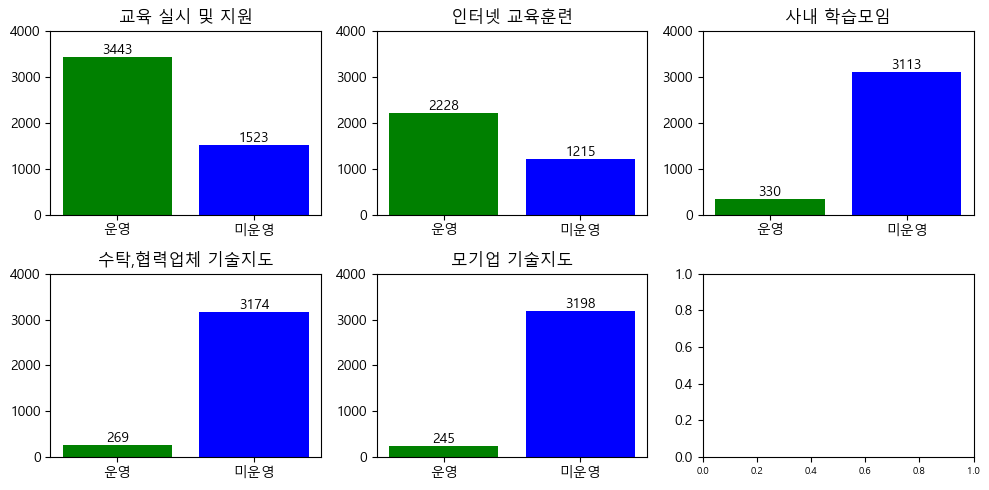

In [40]:
edu_df = train_df['C_E1']
edu_df_count = edu_df.value_counts()
edu_df_op = edu_df_count[1]
edu_df_nop = edu_df_count[2]
def value_count(s):
    result = train_df[s].dropna().value_counts()
    return result
value_count_df = ['C_E2_3', 'C_E2_4', 'C_E2_5', 'C_E2_6',]
def make_edu_list_detail(value_count_df):
    edu_list_detail = []
    for i in value_count_df:
        value_count_df = value_count(i)
        edu_list_detail.append(value_count_df[1])
        edu_list_detail.append(value_count_df[0])
    return edu_list_detail
def make_graph(edu_list_detail):
    colors = ['g','b']
    fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2,3, figsize=(10,5))
    # subplot 간 간격 조절(hspace 가 수평간, wspace가 수직간)
    fig.subplots_adjust(hspace=0.5, wspace=0.3)
    ax1.bar(x=['운영','미운영'], height=[edu_df_op, edu_df_nop], color = colors)
    ax1.set_title('교육 실시 및 지원')
    ax1.bar_label(ax1.containers[0])
    ax1.set_ylim([0,4000])
    ax2.bar(x=['운영','미운영'], height=[edu_list_detail[0], edu_list_detail[1]], color = colors)
    ax2.set_title('인터넷 교육훈련')
    ax2.bar_label(ax2.containers[0])
    ax2.set_ylim([0,4000])
    ax3.bar(x=['운영','미운영'], height=[edu_list_detail[2], edu_list_detail[3]], color = colors)
    ax3.set_title('사내 학습모임')
    ax3.bar_label(ax3.containers[0])
    ax3.set_ylim([0,4000])
    ax4.bar(x=['운영','미운영'], height=[edu_list_detail[4], edu_list_detail[5]], color = colors)
    ax4.set_title('수탁,협력업체 기술지도')
    ax4.bar_label(ax4.containers[0])
    ax4.set_ylim([0,4000])
    ax5.bar(x=['운영','미운영'], height=[edu_list_detail[6], edu_list_detail[7]], color = colors)
    ax5.set_title('모기업 기술지도')
    ax5.bar_label(ax5.containers[0])
    ax5.set_ylim([0,4000])
    plt.xticks(fontsize = 7)
    plt.tight_layout()
    plt.show()
if __name__=='__main__':
    edu_list_detail = make_edu_list_detail(value_count_df)
    make_graph(edu_list_detail)

```
실시하는 교육으로 인터넷 교육훈련, 사내 학습모임, 수탁 협력업체 기술지도, 모기업 기술지도가 있으며, 대부분의 교육이 인터넷 강의로만 이뤄지고 있음. 실제 근로자의 업무 맞춤형 지원(사내 학습모임, 기술지도)은 거의 없는 것으로 나타남
```

### (4) 장애인 근로자 평균 근속 기간

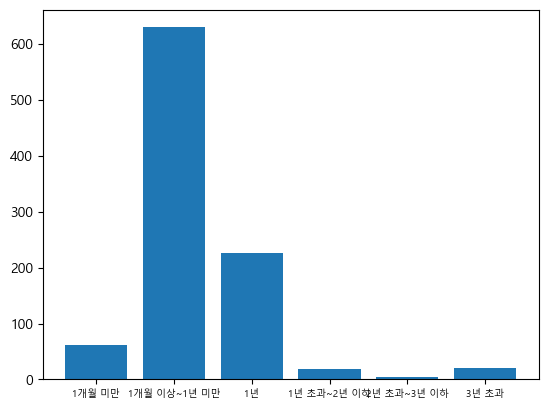

In [41]:
contract = data['D14_1']
contract_dropna = contract.dropna()
contract = data['D14_1']
contract_df = contract.dropna()
contract_df_counts = contract_df.value_counts()
contract_df_counts = contract_df_counts.reset_index().rename(columns={'D14_1': 'periods', 'count': 'num'})
sorted_data = contract_df_counts.sort_values('periods')
sorted_data['periods'] = sorted_data['periods'].astype(int)
sorted_data.set_index('periods', inplace=True)
x = ['1개월 미만','1개월 이상~1년 미만','1년','1년 초과~2년 이하','2년 초과~3년 이하','3년 초과']
y = sorted_data['num'].values
plt.bar(x,y)
plt.xticks(fontsize = 7)
plt.show()

```
장애인 근로자 평균근속 기간은 1개월 이상~1년 미만, 1년, 1개월 미만 순으로 나타났으며 특히, 1개월 이상~1년 미만의 비율이 66%으로 가장 높음
```

**장애인의 고용현황(직업별, 근로형태별), 근속기간을 살펴보았을 때, 단순노무직, 비정규직 비율이 높고 근속기간이 짧은 것으로 나타남. 이를 통해 장애인 근로자의 업무 기술 터득, 장애인 근로자 간의 업무승계(노하우 승계)가 어려울 것으로 예상됨**

# 2. 아이디어 설명

#### - 아이디어명 : SkillBridge AI

#### - 아이디어 개요
"SkillBridge AI"는 장애인 근로자를 위한 맞춤형 업무 노하우와 매뉴얼을 제공하는 AI 서비스입니다. 이 서비스는 기 근로하고 있는 장애인 근로자의 업무 노하우와 매뉴얼을 저장하고 AI 모델을 학습하여 신규 입사한 장애인 근로자에게 제공합니다.

#### - 구현방법
- 데이터 수집 및 저장<br></br>
    - 기 근로하고 있는 장애인 근로자들의 업무 노하우와 매뉴얼을 수집하고 저장합니다.
    - 이러한 데이터는 텍스트, 이미지 형식으로 저장되며, 데이터베이스에 저장 및 관리됩니다.

- AI 모델 학습<br></br>
    - 텍스트 : 수집한 데이터를 GPT2 모델과 같은 자연어 처리 모델을 사용하여 학습시킵니다.
    - 이미지 : DALL-E 와 같은 image API 프로그램을 활용합니다.
    - 학습된 모델은 장애인 근로자의 업무 노하우와 매뉴얼을 이해하고 생성하는 능력을 갖게 됩니다.

- 신입 장애인 근로자에게 제공<br></br>
    - 신규 입사한 장애인 근로자가 서비스에 접근하면, AI 모델은 그들의 업무 수행을 지원하기 위해 맞춤형 노하우와 매뉴얼을 제공합니다.
    - 제공되는 내용은 기존 장애인 근로자의 경험과 지식을 바탕으로 생성되어 업무 수행을 돕고 단절을 예방합니다.
    - 텍스트에 대해 이해가 어려운 근로자에게는 이미지를 제공할 수 있습니다.

#### - 아이디어 구현예시

- 데이터 학습

In [ ]:
from transformers import GPT2LMHeadModel, GPT2Tokenizer, TextDataset, DataCollatorForLanguageModeling
from transformers import Trainer, TrainingArguments
tokenizer = GPT2Tokenizer.from_pretrained('./result_storage')
model = GPT2LMHeadModel.from_pretrained('./result_storage/checkpoint-2')
dataset = TextDataset(
    tokenizer=tokenizer,
    file_path="D:/김형찬/P6_disabled/P6_EmpCont/data/training_data.txt", # 학습 데이터 텍스트 파일 경로
    block_size=128)
data_collator = DataCollatorForLanguageModeling(
    tokenizer=tokenizer, mlm=False,)
training_args = TrainingArguments(
    output_dir="./result_storage", # 학습 결과를 저장할 경로
    overwrite_output_dir=True,
    num_train_epochs=1,
    per_device_train_batch_size=1,
    save_steps=1,
    save_total_limit=2,)
trainer = Trainer(
    model=model,
    args=training_args,
    data_collator=data_collator,
    train_dataset=dataset,)
trainer.train()
tokenizer.save_pretrained("./result_storage")

- 알고 싶은 부분 입력 시 학습된 노하우, 매뉴얼 출력

In [ ]:
from transformers import GPT2LMHeadModel, GPT2Tokenizer
tokenizer = GPT2Tokenizer.from_pretrained('./result_storage')
model = GPT2LMHeadModel.from_pretrained('./result_storage/checkpoint-27')
# text 기입 시 해당 text와 관련된 매뉴얼, 노하우 출력됨
input_text = "민원 업무"
input_ids = tokenizer.encode(input_text, return_tensors='pt')
output = model.generate(input_ids, max_length=50, num_return_sequences=1, temperature=0.7)
generated_text = tokenizer.decode(output[0])

서비스 화면 예시

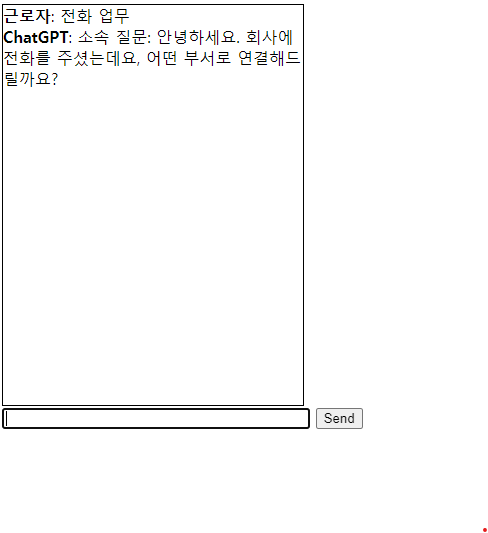

In [27]:
from IPython.display import Image
Image("../data/gpt_screen.png")


# 3. 아이디어 기대효과 및 AI 활용 장점

- 기대효과<br></br>
    - 업무 노하우 단절 방지: 기 근로하고 있는 장애인 근로자들의 노하우와 매뉴얼이 저장되고 공유되므로, 이러한 지식이 유실되지 않고 장기적으로 보전됩니다.<br></br>
    - 신입 장애인 근로자 업무 수행 용이: 신규 입사한 장애인 근로자들은 AI 서비스를 통해 기존 근로자들의 경험과 노하우를 쉽게 습득할 수 있으며, 업무 수행에 대한 자신감을 얻을 수 있습니다.<br></br>
    - 생산성 향상: 업무 수행에 필요한 정보를 신속하게 얻을 수 있으므로, 장애인 근로자들의 생산성이 향상됩니다.<br></br>
    - 사회적 포용 강화: AI 서비스를 통해 장애인 근로자들이 일자리에 쉽게 참여할 수 있게 되어, 사회적 포용성이 강화됩니다. 장애인 근로자들이 다양한 직종에 참여하고, 자신들의 능력을 발휘하는 데 도움을 줄 수 있습니다.<br></br>
    - 비장애인과의 협업 촉진: AI 서비스를 통해 장애인 근로자들이 비장애인 근로자들과의 협업을 향상시킬 수 있습니다. 노하우와 지식이 쉽게 공유되므로, 팀워크와 협업 능력이 향상될 것입니다.<br></br>
    - 훈련 및 교육 비용 절감: AI를 통한 교육 방법은 신규 근로자들에게 필요한 교육을 제공하는 데 비용과 시간을 절감하게 됩니다.<br></br>
- AI 활용 장점<br></br>
    - GPT와 같은 자연어 처리 AI는 언어 이해와 생성 능력 덕분에 맞춤형 피드백과 지원을 제공할 수 있습니다. 사용자의 특정 질문이나 문제에 즉각적으로 반응하면서, 개인화된 학습 경험을 제공할 수 있습니다.<br></br>
    - Image API는 복잡한 개념이나 프로세스를 시각적으로 표현하는 데 유용합니다. 이로 인해 이해가 어려운 내용도 쉽게 파악하고 학습할 수 있게 해줍니다. 또한, 이러한 시각적 표현은 장애인 근로자들에게 업무 수행 방법을 더 명확하게 이해하는 데 도움을 줄 수 있습니다. <br></br>
    - AI 기술은 계속 발전하고 있으며, 향후에는 더욱 진보된 AI 모델이 출현하여 더욱 다양하고 효과적인 학습 경험을 제공할 것으로 기대됩니다. 이는 장애인 근로자들에게 더 많은 교육 기회를 제공하는 데 도움이 될 것입니다.